# Binary classification based on Logistic Regression using non-linear regression function

## import library

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [107]:
fname_data1 = 'assignment_09_data1.txt'
fname_data2 = 'assignment_09_data2.txt'

data1 = np.genfromtxt(fname_data1, delimiter=',')
data2 = np.genfromtxt(fname_data2, delimiter=',')

# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

x1 = data1[:,0]
y1 = data1[:,1]
x2 = data2[:,0]
y2 = data2[:,1]


## plot the data

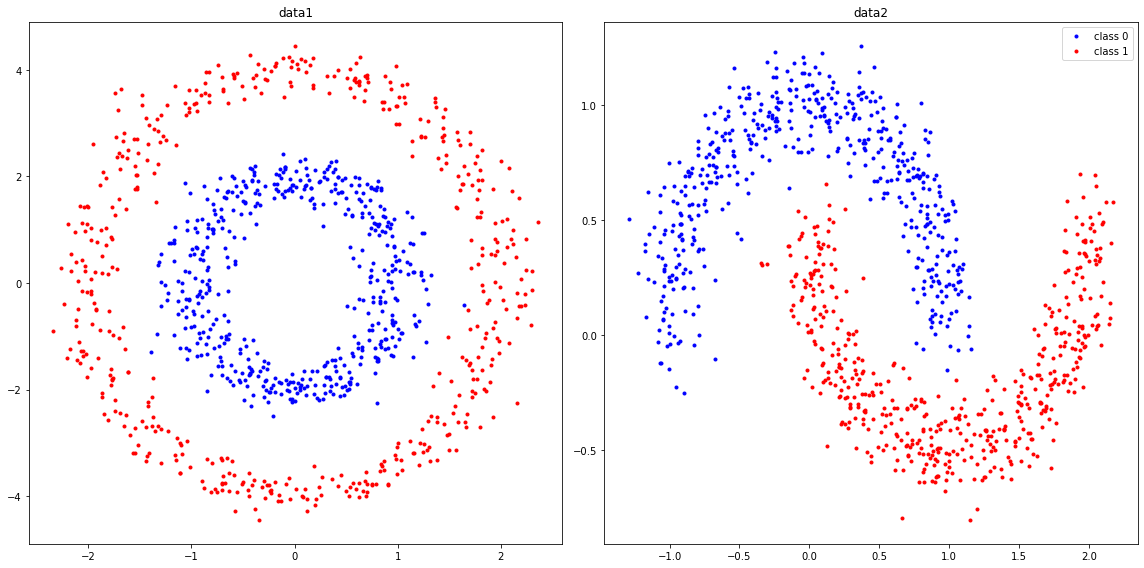

In [243]:
# data 분류
num_data1, num_data2 = data1.shape[0], data2.shape[0]
data1_zero, data1_one = [],[]
data2_zero, data2_one = [],[]

for data in data1:
    if data[2] == 0:
        data1_zero.append(data[:2])
    else:
        data1_one.append(data[:2])
for data in data2:
    if data[2] == 0:
        data2_zero.append(data[:2])
    else:
        data2_one.append(data[:2])
        
data1_zero, data1_one = np.array(data1_zero), np.array(data1_one)
data2_zero, data2_one = np.array(data2_zero), np.array(data2_one)


# plot
plt.figure(figsize=(16,8))

# data1
plt.subplot(121)
plt.plot(data1_zero[:,0], data1_zero[:,1], '.', color = 'blue', label='class 0')
plt.plot(data1_one[:,0], data1_one[:,1], '.', color = 'red', label='class 1')
plt.title('data1')

# data2
plt.subplot(122)
plt.plot(data2_zero[:,0], data2_zero[:,1], '.', color = 'blue', label='class 0')
plt.plot(data2_one[:,0], data2_one[:,1], '.', color = 'red', label='class 1')
plt.title('data2')

plt.legend()
#plt.axis('equal')
plt.tight_layout()
plt.show()



## define the feature function for each data to obtain the best accuracy

In [307]:
def feature_function1(x, y):
    #
    # point = np.array([[1]*num_data, point_x, point_y])
    feature = np.array([[1]*num_data1, x, y, x*y, x**2, y**2])
    #
    return feature

In [308]:
def feature_function2(x, y):

    feature = np.array([[1]*num_data2, x, x**2, x**3, y] )

    return feature

## define regression function with a vector $\theta$ model parameters and input data 

In [309]:
def regression_function(theta, feature):
    #
    #
    value = feature.T @ theta
    #
    #
    return value

## define sigmoid function with input $x$

In [310]:
def logistic_function(x):

    z = 1 / (1+np.exp(-x))

    return z

## define loss function with feature and label based on the logistic regression

In [311]:
def compute_loss_feature(theta, feature, label):
    #
    wTx = regression_function(theta, feature)
    h = logistic_function(wTx)
    num_data = feature.shape[1]
    
    loss = -(1/num_data) * np.sum( label*np.log(h) + (np.full(num_data,1)-label)*np.log(np.full(num_data,1)-h) )
    #
    return loss

## define gradient vector for the model parameters $\theta$

In [312]:
def compute_gradient_feature(theta, feature, label):
    #
    wTx = regression_function(theta, feature)
    h = logistic_function(wTx)
    num_data = feature.shape[1]
    
    gradient = (1/num_data) * feature@(h-label)
    #
    return gradient

## compute the accuracy

In [34]:
def compute_accuracy(theta, feature, label):
    #
    #
    # fill up the function body
    #
    #
    return accuracy

## gradient descent for the model parameters $\theta$

In [389]:
num_iteration   = 1000000         # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.3           # USE THIS VALUE for the learning rate
#
theta1          = np.array((0, 0, 0, 0, 0, 0))
theta2          = np.array((0, 0, 0, 0, 0))
#

In [390]:
theta1_iteration = np.zeros((num_iteration, theta1.size))
theta2_iteration = np.zeros((num_iteration, theta2.size))
loss1_iteration  = np.zeros(num_iteration)
loss2_iteration  = np.zeros(num_iteration)

feature1 = feature_function1(x1, y1)
feature2 = feature_function2(x2, y2)

In [391]:
# data[:,0] : x
# data[:,1] : y
# data[:,2] : label {0, 1}

for i in range(num_iteration):
    #
    theta1 = theta1 - learning_rate * compute_gradient_feature(theta1, feature1, data1[:,2])
    theta2 = theta2 - learning_rate * compute_gradient_feature(theta2, feature2, data2[:,2])
    loss1 = compute_loss_feature(theta1, feature1, data1[:,2])
    loss2 = compute_loss_feature(theta2, feature2, data2[:,2])
    
    theta1_iteration[i] = theta1
    theta2_iteration[i] = theta2
    loss1_iteration[i] = loss1
    loss2_iteration[i] = loss2
    
    # loss1은 iteration = 408에서 수렴
    #print("iteration = %4d, loss1 = %5.5f" % (i, loss1))
    #print("iteration = %4d, loss2 = %5.5f" % (i, loss2))
    #

theta1_optimal = theta1
theta2_optimal = theta2
print(theta1_iteration.shape)
print(theta2_iteration.shape)

<ipython-input-311-c67d1ddb5bb3>:7: RuntimeWarning: divide by zero encountered in log
  loss = -(1/num_data) * np.sum( label*np.log(h) + (np.full(num_data,1)-label)*np.log(np.full(num_data,1)-h) )
<ipython-input-311-c67d1ddb5bb3>:7: RuntimeWarning: invalid value encountered in multiply
  loss = -(1/num_data) * np.sum( label*np.log(h) + (np.full(num_data,1)-label)*np.log(np.full(num_data,1)-h) )


(1000000, 6)
(1000000, 5)


## compute accuracy of the classifiers

In [161]:
accuracy_classifier1 = compute_accuracy(theta1_optimal, feature1, label1)
accuracy_classifier2 = compute_accuracy(theta2_optimal, feature2, label2)

NameError: name 'label1' is not defined

## plot the results

In [392]:
num = np.arange(num_iteration)
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    #
    plt.title('loss')
    plt.plot(num, loss_iteration, '-', color = 'red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()
    #

In [393]:
def plot_data(data):
    
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    #
    data_zero, data_one = [],[]
    for d in data:
        if d[2] == 0:
            data_zero.append(data[:1])
        else:
            data_one.append(data[:1])
    data_zero, data_one = np.array(data_zero), np.array(data_one)
    
    plt.plot(data_zero, '.', color = 'blue', label='class 0')
    plt.plot(data_one, '.', color = 'red', label='class 1')
    plt.title('data')

    plt.legend()
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    #

In [394]:

def plot_model_parameter(theta_iteration):
    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    #
    plt.title('model parameter')
    
    plt.xlabel('iteration')
    
    if theta_iteration.shape[1] == 6:
        plt.plot(num, theta_iteration[:,0], '-', color = 'red', label = 'theta0')
        plt.plot(num, theta_iteration[:,1], '-', color = 'green', label = 'theta1')
        plt.plot(num, theta_iteration[:,2], '-', color = 'blue', label = 'theta2')
        plt.plot(num, theta_iteration[:,3], '-', color = 'orange', label = 'theta3')
        plt.plot(num, theta_iteration[:,4], '-', color = 'purple', label = 'theta4')
        plt.plot(num, theta_iteration[:,3], '-', color = 'yellow', label = 'theta5')
    else:
        plt.plot(num, theta_iteration[:,0], '-', color = 'red', label = 'theta0')
        plt.plot(num, theta_iteration[:,1], '-', color = 'green', label = 'theta1')
        plt.plot(num, theta_iteration[:,2], '-', color = 'blue', label = 'theta2')
        plt.plot(num, theta_iteration[:,3], '-', color = 'orange', label = 'theta3')
        plt.plot(num, theta_iteration[:,4], '-', color = 'purple', label = 'theta4')

    plt.legend(loc = 'center right')
    
    plt.tight_layout()
    plt.show()
    #

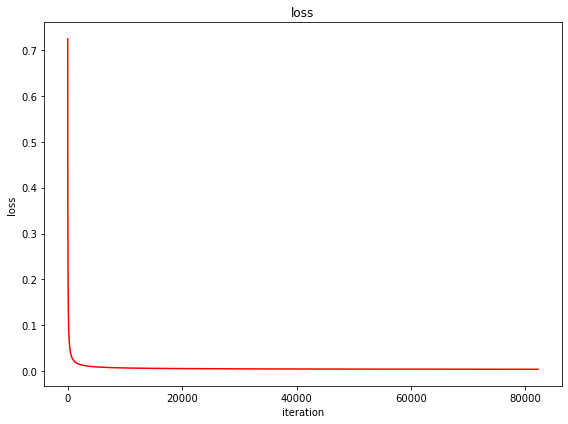

In [395]:
plot_loss_curve(loss1_iteration)

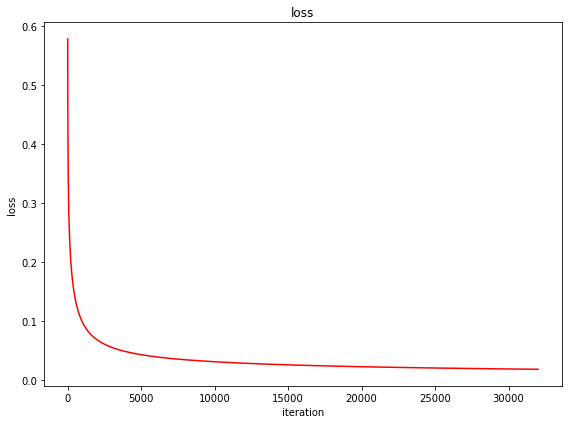

In [396]:
plot_loss_curve(loss2_iteration)

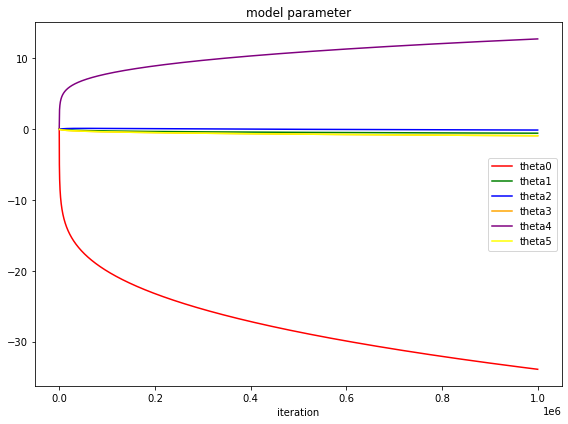

In [397]:
plot_model_parameter(theta1_iteration)

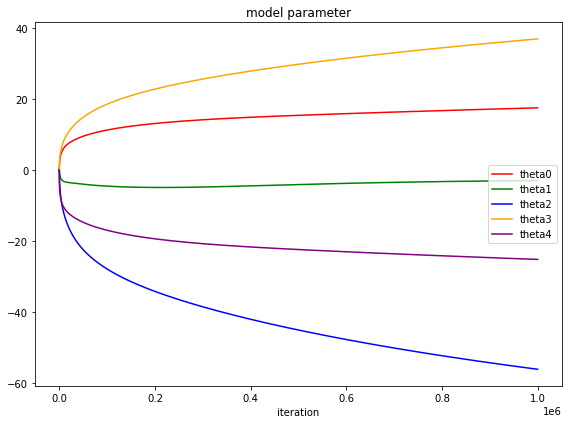

In [398]:
plot_model_parameter(theta2_iteration)

In [399]:
X0 = np.arange(-5, 5, 0.01)
X1 = np.arange(-5, 5, 0.01)
xx, yy = np.meshgrid(X0, X1)
zz1 = theta1[0] + theta1[1]*xx + theta1[2]*yy + theta1[3]*(xx*yy) + theta1[4]*(xx**2) + theta1[5]**yy

def plot_classifier1(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    #
    plt.contour(xx, yy, zz1, levels=[0] ,colors="black")
    plt.contourf(xx, yy, zz1, cmap='RdBu', vmin=zz1.min(), vmax=zz1.max(),levels=np.linspace(zz1.min(), zz1.max(), 70))
    
    plt.plot(data1_zero[:,0], data1_zero[:,1], '.', color = 'blue', label='class 0')
    plt.plot(data1_one[:,0], data1_one[:,1], '.', color = 'red', label='class 1') 
    
    plt.legend()
    #plt.axis('equal')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    #

In [400]:
X0 = np.arange(-2, 3, 0.01)
X1 = np.arange(-2, 3, 0.01)
xx2, yy2 = np.meshgrid(X0, X1)
zz2 = theta2[0] + theta2[1]*xx2 + theta2[2]*(xx2**2) + theta2[3]*(xx2*3) + theta2[4]*yy2

def plot_classifier2(data, theta):
    
    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    #
    plt.contour(xx2, yy2, zz2, levels=[0] ,colors="black")
    plt.contourf(xx2, yy2, zz2, cmap='RdBu_r', vmin=zz2.min(), vmax=zz2.max(),levels=np.linspace(zz2.min(), zz2.max(), 70))
    
    plt.plot(data2_zero[:,0], data2_zero[:,1], '.', color = 'blue', label='class 0')
    plt.plot(data2_one[:,0], data2_one[:,1], '.', color = 'red', label='class 1')

    plt.legend()
    #plt.axis('equal')
    plt.colorbar()
    plt.tight_layout()
    plt.show()
    #

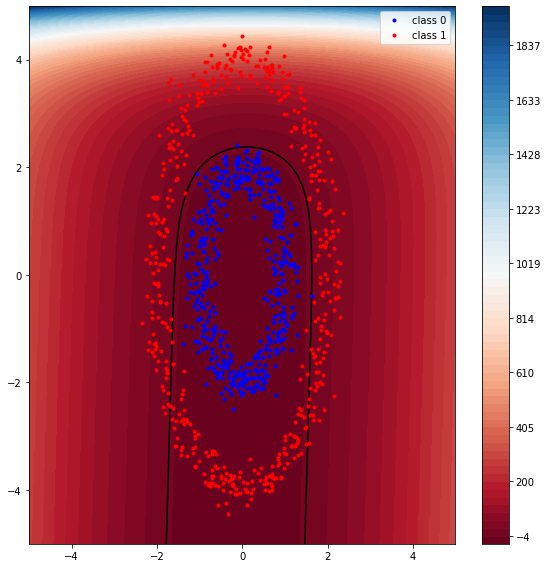

In [401]:
plot_classifier1(data1, theta1_optimal)

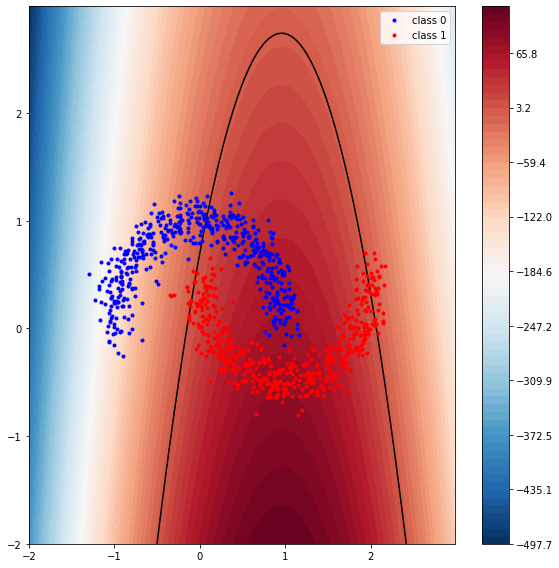

In [402]:
plot_classifier2(data2, theta2_optimal)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data (data1) from the file [assignment_09_data1.txt] in blue for class 0 and in red for class 1

In [ ]:
plot_data(data1)

### # 02. plot the input data (data2) from the file [assignment_09_data2.txt] in blue for class 0 and in red for class 1

In [ ]:
plot_data(data2)

### # 03. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data1

In [ ]:
plot_model_parameter(theta1_iteration)

### # 04. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors for data2

In [ ]:
plot_model_parameter(theta2_iteration)

### # 05. plot the loss values in red curve over the gradient descent iterations for data1

In [ ]:
plot_loss_curve(loss1_iteration)

### # 06. plot the loss values in red curve over the gradient descent iterations for data2

In [ ]:
plot_loss_curve(loss2_iteration)

### # 07. plot the classifier with the given data points superimposed for data1

In [ ]:
plot_classifier1(data1, theta1_optimal)

### # 08. plot the classifier with the given data points superimposed for data2

In [ ]:
plot_classifier2(data2, theta2_optimal)

### # 09. print out the accuracy of the obtained classifier1 for data1

In [ ]:
print(accuracy_classifier1)

### # 10. print out the accuracy of the obtained classifier2 for data1

In [ ]:
print(accuracy_classifier2)